In [76]:
import os
from datetime import date
import pandas as pd
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw
from jugaad_data.nse import stock_df
import jugaad_data as jd
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas_datareader.data import DataReader
import warnings

In [77]:
from jugaad_data.nse import NSELive
n = NSELive()
q = n.stock_quote("KSCL")
print(q['priceInfo'])

{'lastPrice': 660, 'change': 4.899999999999977, 'pChange': 0.747977408029305, 'previousClose': 655.1, 'open': 660, 'close': 662.55, 'vwap': 665.96, 'lowerCP': '524.10', 'upperCP': '786.10', 'pPriceBand': '20', 'basePrice': 655.1, 'intraDayHighLow': {'min': 656.1, 'max': 675, 'value': 660}, 'weekHighLow': {'min': 466.5, 'minDate': '31-Mar-2023', 'max': 692, 'maxDate': '19-Oct-2023', 'value': 660}, 'iNavValue': None, 'checkINAV': False}


In [78]:
from jugaad_data.nse import stock_df
agri_data_df = stock_df(symbol='KSCL', 
                                from_date=date(2011,1,1), 
                                to_date=date(2024,1,5), 
                                series="EQ")


In [79]:
from jugaad_data.nse import NSELive
n = NSELive()
q = n.stock_quote("KSCL")
print(q['priceInfo'])

{'lastPrice': 660, 'change': 4.899999999999977, 'pChange': 0.747977408029305, 'previousClose': 655.1, 'open': 660, 'close': 662.55, 'vwap': 665.96, 'lowerCP': '524.10', 'upperCP': '786.10', 'pPriceBand': '20', 'basePrice': 655.1, 'intraDayHighLow': {'min': 656.1, 'max': 675, 'value': 660}, 'weekHighLow': {'min': 466.5, 'minDate': '31-Mar-2023', 'max': 692, 'maxDate': '19-Oct-2023', 'value': 660}, 'iNavValue': None, 'checkINAV': False}


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [81]:
agri_data_df['DATE'] = pd.to_datetime(agri_data_df['DATE'], format='%m-%d-%Y')
agri_data_df

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-01-02,EQ,647.95,655.00,640.00,646.20,644.40,644.85,646.22,692.0,466.50,176306,1.139320e+08,13378,KSCL
1,2024-01-01,EQ,657.00,659.35,640.50,612.60,647.00,646.20,649.01,692.0,466.50,1093664,7.097974e+08,40542,KSCL
2,2023-12-29,EQ,614.00,618.40,608.75,611.65,611.10,612.60,613.49,692.0,466.50,45947,2.818807e+07,4519,KSCL
3,2023-12-28,EQ,615.00,621.20,610.00,612.15,610.40,611.65,612.97,692.0,466.50,55342,3.392326e+07,5758,KSCL
4,2023-12-27,EQ,619.55,628.55,598.60,616.45,614.50,612.15,616.41,692.0,466.50,78785,4.856412e+07,5202,KSCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,2011-01-07,EQ,345.00,347.00,340.10,343.80,340.15,342.10,343.52,449.0,225.05,2887,9.917449e+05,0,KSCL
3228,2011-01-06,EQ,352.00,352.00,341.15,348.55,343.00,343.80,343.99,449.0,225.05,4743,1.631549e+06,0,KSCL
3229,2011-01-05,EQ,350.00,352.00,334.40,345.60,346.00,348.55,343.36,449.0,225.05,21780,7.478353e+06,0,KSCL
3230,2011-01-04,EQ,365.00,365.00,343.40,360.00,345.00,345.60,347.96,449.0,225.05,25157,8.753644e+06,0,KSCL


In [85]:
def map_to_season(month):
    if month in range(1,4):
        return 'Late Winter/Spring'
    elif month in range(4,6):
        return 'Summer'
    elif month in range(7,10):
        return 'Monsoon'
    else:
        return 'Winter'

agri_data_df['Month'] = agri_data_df['DATE'].dt.month
agri_data_df['Season'] = agri_data_df['Month'].apply(map_to_season)
seasonal_data = agri_data_df.groupby(['Year', 'Season'])['CLOSE'].mean().unstack()


<Figure size 576x432 with 0 Axes>

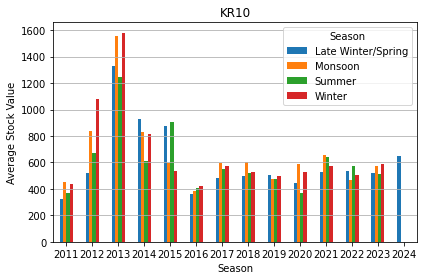

In [86]:
plt.figure(figsize=(8, 6))
seasonal_data.plot(kind='bar')
plt.title('KR10')
plt.xlabel('Season')
plt.ylabel('Average Stock Value')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1152x864 with 0 Axes>

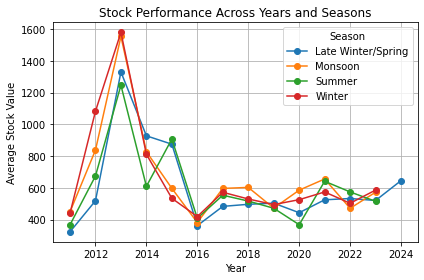

In [87]:
agri_data_df['Year'] = agri_data_df['DATE'].dt.year
plt.figure(figsize=(16, 12))
seasonal_data.plot(kind='line', marker='o')
plt.title('Stock Performance Across Years and Seasons')
plt.xlabel('Year')
plt.ylabel('Average Stock Value')
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

In [88]:
stock_symbol = 'KSCL.NS'
start_date = '2023-01-08'
end_date = '2024-01-08'
df = yf.download(stock_symbol, start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-09  511.299988  524.150024  511.299988  516.299988  511.986359   
2023-01-10  516.049988  516.299988  503.149994  509.649994  505.391907   
2023-01-11  507.100006  517.950012  507.100006  510.850006  506.581909   
2023-01-12  513.400024  513.400024  501.000000  504.500000  500.284943   
2023-01-13  504.950012  511.850006  502.000000  505.200012  500.979126   
...                ...         ...         ...         ...         ...   
2024-01-01  657.000000  659.349976  640.500000  646.200012  646.200012   
2024-01-02  647.950012  655.000000  640.000000  644.849976  644.849976   
2024-01-03  644.000000  651.599976  643.250000  648.299988  648.299988   
2024-01-04  654.599976  659.000000  647.500000  655.099976  655.099976   
2024-01-05  660.000000  675.000000  656.099

In [89]:
#credits : https://www.geeksforgeeks.org/stock-price-prediction-using-machine-learning-in-python/
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [90]:
df.index = pd.to_datetime(df.index)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-01-09 to 2024-01-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Adj Close  245 non-null    float64
 5   Volume     245 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.4 KB


In [91]:
#see this tomorrow pls 
splitted = df['Date'].date().str.split('-', expand=True)
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

df.groupby('is_quarter_end').mean()
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


KeyError: 'Date'